In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
import pandas as pd

from voronoi_polygons import polygons as voronoi_polygons


%matplotlib inline
np.set_printoptions(precision=4, suppress=True)


In [252]:
data = pd.read_csv('cereals.csv')
columns = data[data==-1].dropna(how='all',axis=0).dropna(how='all', axis=1).columns
for col in columns:
#col = data.columns[8]
#data.loc[:,col][data[col]==-1] = data[col].mean()
#data.loc[:,col]
#data.loc[:,col][data[col]==-1] = data[col].mean()
    data.loc[data[col]==-1, col] = int(data[col].mean())
# data[col][data[col]==-1]
data = pd.get_dummies(data, columns=['mfr','type'])

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,...,cups,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
0,100%_Bran,70,4,1,130,10.0,5.0,6,280,25,...,0.33,0,0,0,1,0,0,0,1,0
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8,135,0,...,1.00,0,0,0,0,0,1,0,1,0
2,All-Bran,70,4,1,260,9.0,7.0,5,320,25,...,0.33,0,0,1,0,0,0,0,1,0
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0,330,25,...,0.50,0,0,1,0,0,0,0,1,0
4,Almond_Delight,110,2,2,200,1.0,14.0,8,96,25,...,0.75,0,0,0,0,0,0,1,1,0
5,Apple_Cinnamon_Cheerios,110,2,2,180,1.5,10.5,10,70,25,...,0.75,0,1,0,0,0,0,0,1,0
6,Apple_Jacks,110,2,0,125,1.0,11.0,14,30,25,...,1.00,0,0,1,0,0,0,0,1,0
7,Basic_4,130,3,2,210,2.0,18.0,8,100,25,...,0.75,0,1,0,0,0,0,0,1,0
8,Bran_Chex,90,2,1,200,4.0,15.0,6,125,25,...,0.67,0,0,0,0,0,0,1,1,0
9,Bran_Flakes,90,3,0,210,5.0,13.0,5,190,25,...,0.67,0,0,0,0,1,0,0,1,0


In [3]:
data = pd.read_csv('cereals.csv')  #next time set na_values=-1...!
data[data==-1].dropna(how='all',axis=[0,1])

,carbo,sugars,potass
4,NaN,NaN,-1
20,NaN,NaN,-1
57,-1,-1,NaN


In [5]:
# drop_rows = list(data[data==-1].dropna(how='all',axis=[0,1]).index)[0]

# while drop_rows:
#     drop_rows = list(data[data==-1].dropna(how='all',axis=[0,1]).index)[0]
# # drop_rows.index
#     data.pop(drop_rows)
# # data
# list(drop_rows)

In [7]:
corrs = data.corr()
corrs[(corrs>0.5) | (corrs < -0.5)]#.dropna(how='all', axis=[0,1]) #doesn't do anything here

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
calories,1.000000,NaN,NaN,NaN,NaN,NaN,0.56234,NaN,NaN,NaN,0.696091,NaN
protein,NaN,1.000000,NaN,NaN,0.500330,NaN,NaN,0.549407,NaN,NaN,NaN,NaN
fat,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sodium,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiber,NaN,0.500330,NaN,NaN,1.000000,NaN,NaN,0.903374,NaN,NaN,NaN,-0.513061
carbo,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
sugars,0.562340,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN
potass,NaN,0.549407,NaN,NaN,0.903374,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
vitamins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
shelf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN


In [8]:
#Now do linear regression on fiber

In [9]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import scipy
%matplotlib inline


In [10]:
data = pd.read_csv('cereals.csv', na_values=-1)
data = data.set_index('name') #So that we can impute the mean
                       #TODO: Convert mfr, type to dummy variables (onehot)

In [11]:
data.pop('mfr')# Remove these for now, but later encode with OneHot dummy variables
data.pop('type')

name
100%_Bran                                 C
100%_Natural_Bran                         C
All-Bran                                  C
All-Bran_with_Extra_Fiber                 C
Almond_Delight                            C
Apple_Cinnamon_Cheerios                   C
Apple_Jacks                               C
Basic_4                                   C
Bran_Chex                                 C
Bran_Flakes                               C
Cap'n'Crunch                              C
Cheerios                                  C
Cinnamon_Toast_Crunch                     C
Clusters                                  C
Cocoa_Puffs                               C
Corn_Chex                                 C
Corn_Flakes                               C
Corn_Pops                                 C
Count_Chocula                             C
Cracklin'_Oat_Bran                        C
Cream_of_Wheat_(Quick)                    H
Crispix                                   C
Crispy_Wheat_&_Raisins     

In [12]:
data.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
name,,,,,,,,,,,,
100%_Bran,70,4,1,130,10,5,6,280,25,3,1,0.33
100%_Natural_Bran,120,3,5,15,2,8,8,135,0,3,1,1.00
All-Bran,70,4,1,260,9,7,5,320,25,3,1,0.33
All-Bran_with_Extra_Fiber,50,4,0,140,14,8,0,330,25,3,1,0.50
Almond_Delight,110,2,2,200,1,14,8,NaN,25,3,1,0.75


In [13]:
data.iloc[1].name

'100%_Natural_Bran'

In [131]:
# columns = {i: col for i,col in enumerate(data.columns)}
# rows = {i: data.iloc(i).name for i in list(range(len(data)))}

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean')#, axis=0)#, verbose=0, copy=True)
df = pd.DataFrame(imp.fit_transform(data), columns=data.columns, index=data.index)
df.head()


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
name,,,,,,,,,,,,
100%_Bran,70,4,1,130,10,5,6,280.000000,25,3,1,0.33
100%_Natural_Bran,120,3,5,15,2,8,8,135.000000,0,3,1,1.00
All-Bran,70,4,1,260,9,7,5,320.000000,25,3,1,0.33
All-Bran_with_Extra_Fiber,50,4,0,140,14,8,0,330.000000,25,3,1,0.50
Almond_Delight,110,2,2,200,1,14,8,98.666667,25,3,1,0.75


In [132]:
## Need to normalize to something (maybe calories) first!!sc

In [133]:
kmeans = KMeans(5)
scaled = preprocessing.scale(df)
kmeans.fit(scaled)
clusters = (kmeans.predict(scaled))
print(kmeans.cluster_centers_)
print(clusters)
#centroids, clusters = kmeans(img_data, 3)

[[-0.0973  0.1114 -0.4575  0.9177 -0.3926  1.1029 -0.8931 -0.5038  0.6046
  -0.3184 -0.1981  0.7861]
 [ 0.208  -0.9194  0.0325  0.124  -0.6593 -0.5971  0.9932 -0.7092 -0.1463
  -0.4711 -0.1981  0.2098]
 [ 1.1031  0.5261  1.0459 -0.0279  0.4824 -0.1471  0.6201  0.8758  0.185
   0.8867  1.1594 -0.5159]
 [-0.8722  0.3097 -0.5424 -1.1403  0.1271  0.1244 -0.8225  0.0352 -0.61
  -0.109  -0.6584 -0.2564]
 [-2.2498  1.3373 -0.3463  0.204   3.7368 -2.1098 -0.7774  3.0617 -0.1463
   0.9578 -0.1981 -1.8788]]
[4 2 4 4 1 1 1 2 3 3 1 0 1 2 1 0 0 1 1 2 3 0 1 0 1 1 3 2 2 1 1 1 3 3 2 1 1
 1 0 2 0 3 1 3 2 2 2 0 1 2 0 2 2 0 3 3 3 3 2 2 3 0 0 3 3 3 1 0 3 0 2 0 0 1
 0 0 1]


In [134]:
data.head()
# print(kmeans)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
name,,,,,,,,,,,,
100%_Bran,70,4,1,130,10,5,6,280,25,3,1,0.33
100%_Natural_Bran,120,3,5,15,2,8,8,135,0,3,1,1.00
All-Bran,70,4,1,260,9,7,5,320,25,3,1,0.33
All-Bran_with_Extra_Fiber,50,4,0,140,14,8,0,330,25,3,1,0.50
Almond_Delight,110,2,2,200,1,14,8,NaN,25,3,1,0.75


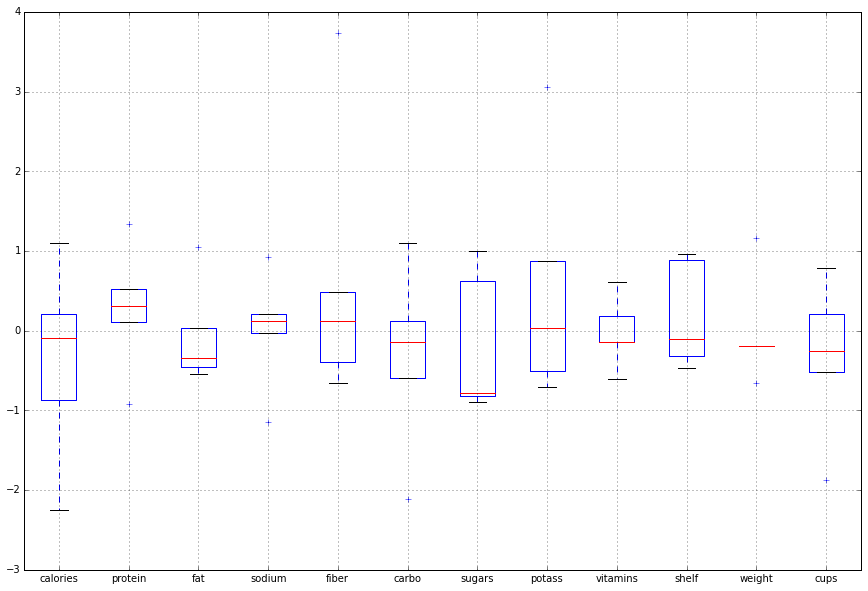

In [135]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)
# centroids.plot(figsize=(15,10), kind='bar')
# centroids.plot(figsize=(15,10), kind='box')
centroids.plot(figsize=(15,10), kind='box')
# centroids.plot(figsize=(15,10), kind='line')

# plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#dfm = df.groupby('label').mean()

In [136]:
# clustered_cereals = [(label, data.iloc[i].name) for (i,label) in enumerate(list(clusters))]
# clustered_cereals
# pd.DataFrame(sorted(clustered_cereals, key=lambda x: x[0]))
df['label'] = np.array(clusters)
df.set_index(['label', df.index]).head(2)

,,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
label,name,,,,,,,,,,,,
4,100%_Bran,70,4,1,130,10,5,6,280,25,3,1,0.33
2,100%_Natural_Bran,120,3,5,15,2,8,8,135,0,3,1,1.00


In [211]:
df['name'] = data.index
df = df.sort(['label', 'name'])
# tuples = list(zip(df.label, df.index))
# index = pd.MultiIndex.from_tuples(tuples, names=['label', 'name'])
# ml = pd.DataFrame(df, index=index)
# ml['name'] = df.index
# ml = ml.dropna(axis = 1)
# df.ix[:,0:-2]
grouped = df.set_index(['label', 'name'])
aggs = grouped.groupby(level='label').agg(['mean', 'std'])
aggs

calories              protein                 fat            \
             mean        std      mean       std      mean       std   
label                                                                  
0      105.000000   6.183469  2.666667  1.328422  0.555556  0.615699   
1      110.909091   5.263614  1.545455  0.595801  1.045455  0.785419   
2      128.235294  16.292366  3.117647  0.332106  2.058824  1.144038   
3       90.000000  16.583124  2.882353  0.992620  0.470588  0.717430   
4       63.333333  11.547005  4.000000  0.000000  0.666667  0.577350   

           sodium                 fiber              ...         potass  \
             mean        std       mean       std    ...           mean   
label                                                ...                  
0      236.111111  44.607951   1.222222  1.165966    ...      63.888889   
1      170.000000  56.820519   0.590909  0.648007    ...      49.712121   
2      157.352941  56.709723   3.294118  1.323570    ...     159.117647   
3       64.705882  82.452081   2.452941  1.369360    ...     101.098039   
4      176.666667  72.341781  11.000000  2.645751    ...     310.000000   

                   vitamins                shelf              weight  \
             std       mean        std      mean       std      mean   
label                                                                  
0      32.109901  41.666667  32.084447  1.944444  0.998365  1.000000   
1      25.858241  25.000000   0.000000  1.818182  0.588490  1.000000   
2      51.211427  32.352941  26.167588  2.941176  0.242536  1.202941   
3      36.427394  14.705882  12.682491  2.117647  0.857493  0.931176   
4      26.457513  25.000000   0.000000  3.000000  0.000000  1.000000   

                     cups            
            std      mean       std  
label                                
0      0.000000  1.002778  0.182009  
1      0.000000  0.869545  0.161141  
2      0.186975  0.701765  0.204458  
3      0.167402  0.761765  0.224367  
4      0.000000  0.386667  0.098150  

[5 rows x 24 columns]

In [245]:
# np.array(aggs.columns.levels)

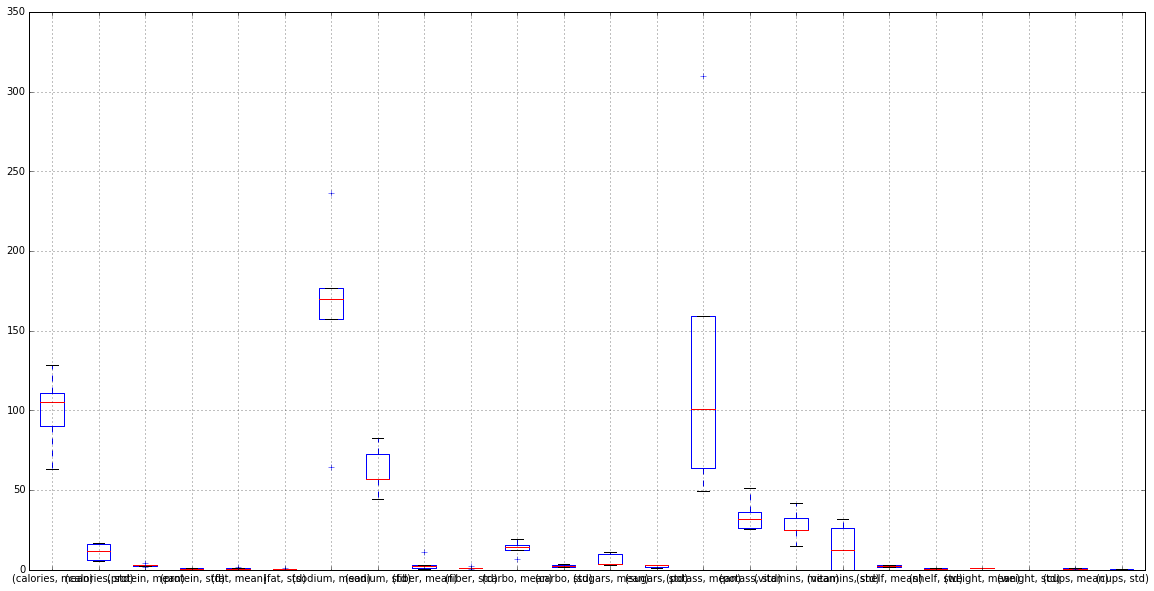

In [248]:
# fig = plt.figure()
# ax = fig.add_subplot(111)

# ax.bar( [0,1,2], [1,3,5] )
# ax.set_xticks( [ 0.5, 1.5, 2.5 ] )
# ax.set_xticklabels( ['tom','dick','harry'], rotation=45 ) ;
##ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

# http://matplotlib.org/examples/pylab_examples/boxplot_demo2.html
# fig, ax1 = plt.subplots(figsize=(10,6))
# xtickNames = plt.setp(ax1, xticklabels=np.repeat(randomDists, 2))
# plt.setp(xtickNames, rotation=45, fontsize=8)
# bp = plt.boxplot(aggs, notch=0, sym='+', vert=1, whis=1.5)

aggs.plot(kind='box', figsize=(20,10))#, ax=ax1)


In [138]:
# plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
# plt.show()

In [139]:
# df.merge()

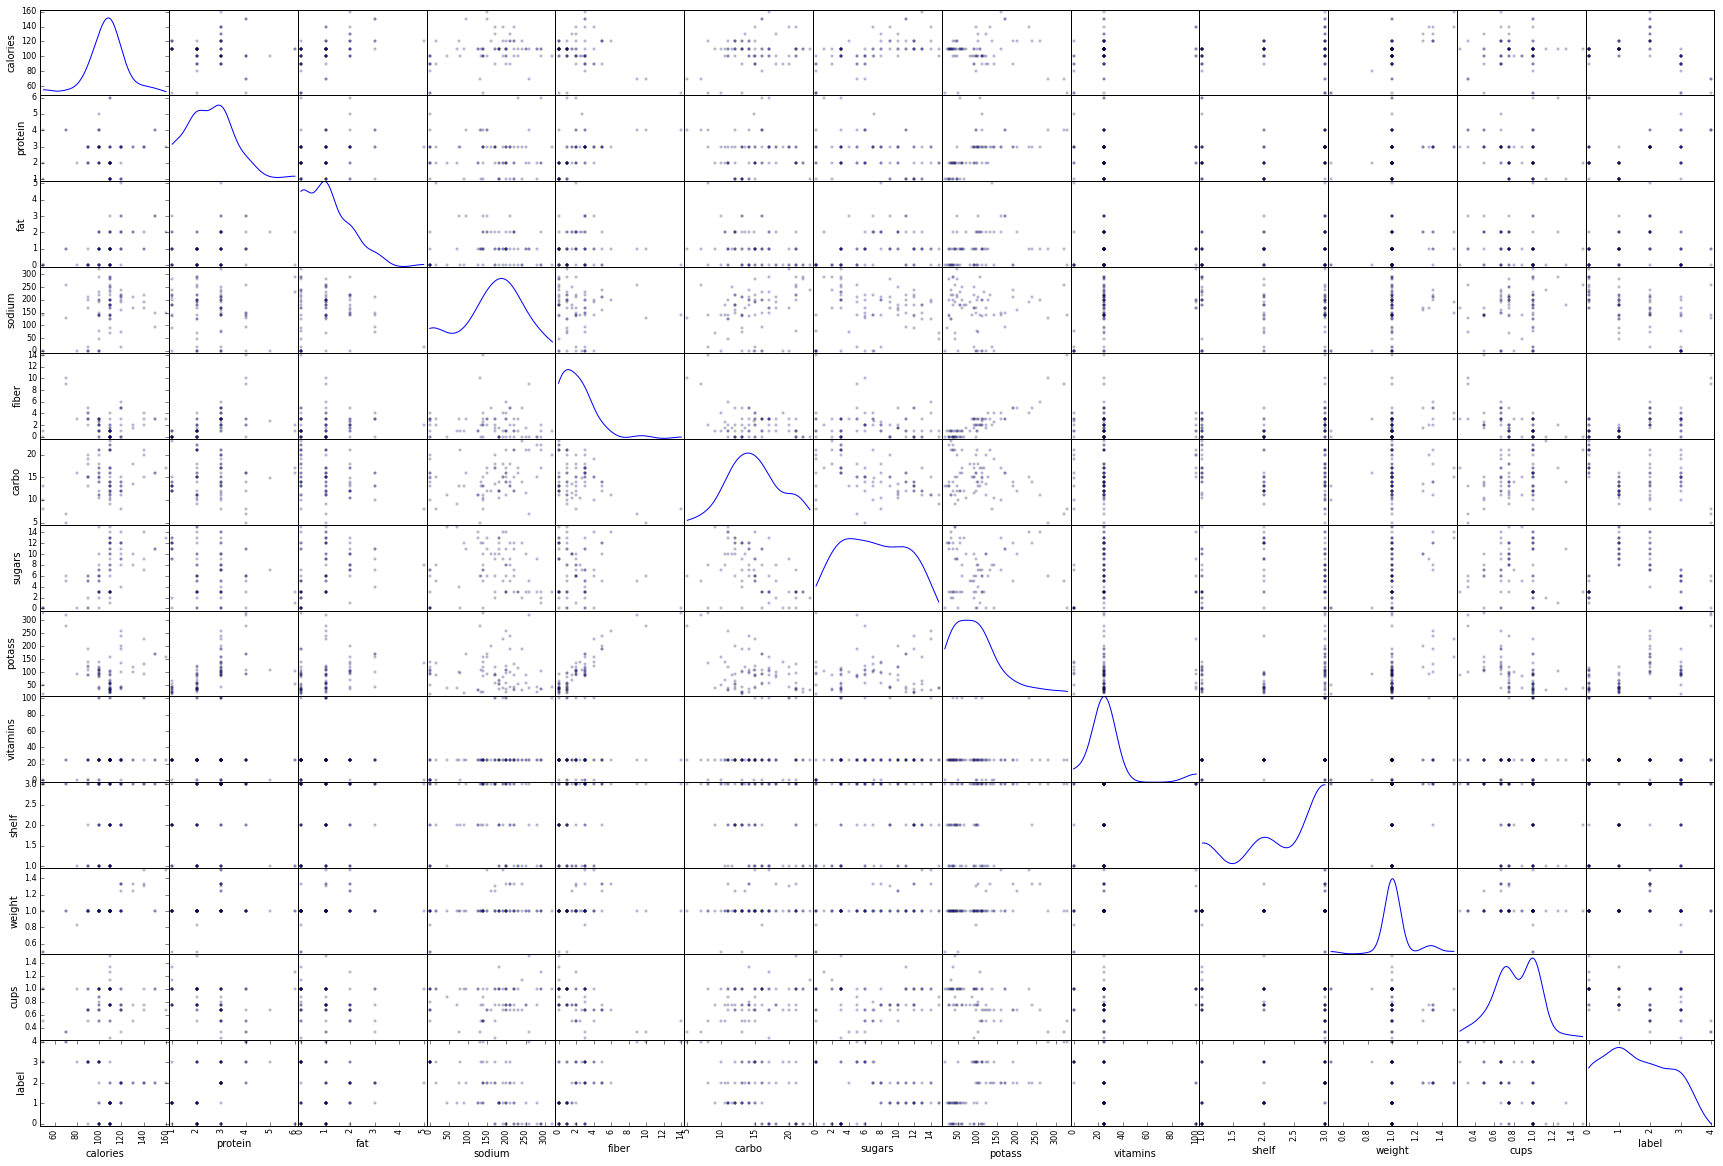

In [250]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(30, 20), diagonal='kde') ;